<a href="https://colab.research.google.com/github/chudah1/Data-Analysis-Journey/blob/main/HostelBooking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Case

*  You have been tasked to analyze the Online Booking Orders to help Management review the current performance of the Business in order to make strategic decisions

*   Top Destination for Customers
*   demographics of the Customers such as 
        * Age groups
        * Gender
        * Location

*  Top Hotels by Booking and Rating?









In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
hostel_data = pd.read_excel("/content/drive/MyDrive/Hostel Booking Challenge_FestMan (1).xlsx")
hostel_data.head()

,Booking ID,Date of Booking,Year,Time,Customer ID,Gender,Age,Origin Country,State,Location,...,Hotel Name,Hotel Rating,Payment Mode,Bank Name,No. Of Days.1,Rooms.1,Booking Price[SGD],Discount,GST,Profit Margin
0,DDMY00001,2010-01-01,2010,10:49:40,MY00001,Male,42,Malaysia,Johor,Iskandar Puteri,...,Hotel Triton,4.3,Wallet,United Overseas Bank (UOB),8,1,243,0.01,0.07,0.25
1,DDID00002,2010-01-01,2010,09:19:47,ID00001,Female,44,Indonesia,Ciawi,West Java,...,Enchanted Isle,4.2,Wallet,EZ-Link,1,2,312,0.00,0.07,0.24
2,DDSG00003,2010-01-01,2010,11:52:56,SG00001,Female,31,Singapore,Central,Rochor,...,Seacoast Hotel,4.5,Credit Card,Grab,7,2,338,0.19,0.07,0.20
3,DDSG00004,2010-01-01,2010,13:44:40,SG00002,Male,28,Singapore,North,Yishun,...,Night In Paradise,4.2,Debit Card,DBS Paylah,4,2,254,0.19,0.07,0.13
4,DDKH00005,2010-01-01,2010,05:38:26,KH00001,Male,44,Cambodia,Phnom Trop,Pursat,...,Tiny Digs Hotel,4.6,Wallet,Bank of Singapore (BOS),3,3,313,0.15,0.07,0.17


In [82]:
hostel_data.describe()


,Year,Age,No. Of People,No. Of Days,Rooms,Hotel Rating,No. Of Days.1,Rooms.1,Booking Price[SGD],Discount,GST,Profit Margin,Booking_Price_After_Tax
count,66535.000000,66535.000000,66535.000000,66535.000000,66535.000000,66535.000000,66535.000000,66535.000000,66535.000000,66535.000000,6.653500e+04,66535.000000,66535.000000
mean,2015.132396,38.436402,3.995852,3.233787,2.283400,4.288508,3.233787,2.283400,214.054212,0.125473,7.000000e-02,0.188815,187.217734
std,2.885649,11.556566,2.000116,3.377939,1.031154,0.275520,3.377939,1.031154,108.127280,0.075115,4.163368e-17,0.052766,96.315230
min,2010.000000,19.000000,1.000000,1.000000,1.000000,3.300000,1.000000,1.000000,35.000000,0.000000,7.000000e-02,0.100000,26.250000
25%,2013.000000,28.000000,2.000000,1.000000,1.000000,4.200000,1.000000,1.000000,125.000000,0.060000,7.000000e-02,0.140000,109.200000
50%,2015.000000,38.000000,4.000000,2.000000,2.000000,4.300000,2.000000,2.000000,199.000000,0.130000,7.000000e-02,0.200000,173.160000
75%,2018.000000,48.000000,6.000000,4.000000,3.000000,4.500000,4.000000,3.000000,293.000000,0.190000,7.000000e-02,0.230000,257.580000
max,2019.000000,58.000000,7.000000,97.000000,4.000000,4.700000,97.000000,4.000000,578.000000,0.250000,7.000000e-02,0.300000,568.000000


We have 65,535 customers. 

The highest booking fee that was charged was 578 cedis .

Highest rating any hotel got was 4.7

The oldest customer is 58 years

In [51]:
hostel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66535 entries, 0 to 66534
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Booking ID               66535 non-null  object        
 1   Date of Booking          66535 non-null  datetime64[ns]
 2   Year                     66535 non-null  int64         
 3   Time                     66535 non-null  object        
 4   Customer ID              66535 non-null  object        
 5   Gender                   66535 non-null  object        
 6   Age                      66535 non-null  int64         
 7   Origin Country           66535 non-null  object        
 8   State                    66535 non-null  object        
 9   Location                 66535 non-null  object        
 10  Destination Country      66535 non-null  object        
 11  Destination City         66535 non-null  object        
 12  No. Of People            66535 n

##Data Cleaning



Dropping columns that won't be needed in the analysis

In [34]:
hostel_data.drop(columns = ["Rooms", "Rooms.1", "Bank Name", "No. Of Days","No. Of Days.1", "Payment Mode"])

,Booking ID,Date of Booking,Year,Time,Customer ID,Gender,Age,Origin Country,State,Location,...,No. Of People,Check-in date,Check-Out Date,Hotel Name,Hotel Rating,Booking Price[SGD],Discount,GST,Profit Margin,Age_group
0,DDMY00001,2010-01-01,2010,10:49:40,MY00001,Male,42,Malaysia,Johor,Iskandar Puteri,...,1,2010-01-12,2010-01-20,Hotel Triton,4.3,243,0.01,0.07,0.25,Adult
1,DDID00002,2010-01-01,2010,09:19:47,ID00001,Female,44,Indonesia,Ciawi,West Java,...,3,2010-01-21,2010-01-22,Enchanted Isle,4.2,312,0.00,0.07,0.24,Adult
2,DDSG00003,2010-01-01,2010,11:52:56,SG00001,Female,31,Singapore,Central,Rochor,...,3,2010-01-02,2010-01-09,Seacoast Hotel,4.5,338,0.19,0.07,0.20,Young Adult
3,DDSG00004,2010-01-01,2010,13:44:40,SG00002,Male,28,Singapore,North,Yishun,...,3,2010-02-15,2010-02-19,Night In Paradise,4.2,254,0.19,0.07,0.13,Young Adult
4,DDKH00005,2010-01-01,2010,05:38:26,KH00001,Male,44,Cambodia,Phnom Trop,Pursat,...,5,2010-01-03,2010-01-06,Tiny Digs Hotel,4.6,313,0.15,0.07,0.17,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66530,DDSG66531,2019-12-31,2019,23:36:16,SG12034,Female,42,Singapore,Central,Orchard,...,4,2020-01-06,2020-01-10,Silver Cloud Inn,4.3,182,0.23,0.07,0.24,Adult
66531,DDSG66532,2019-12-31,2019,14:41:01,SG12035,Female,54,Singapore,Central,Geylang,...,4,2020-04-09,2020-04-13,The Elet,4.2,125,0.06,0.07,0.19,Old
66532,DDSG66533,2019-12-31,2019,19:11:16,SG12036,Female,57,Singapore,Central,Downtown Core,...,7,2020-01-09,2020-01-10,The Elet,4.4,318,0.02,0.07,0.22,Old
66533,DDTH66534,2019-12-31,2019,05:12:29,TH12170,Female,44,Thailand,Surat Thani,Ko Samui,...,3,2020-01-01,2020-01-02,Sunset Lodge,4.2,173,0.14,0.07,0.25,Adult


Analyze the Booking Fee over the Years by Hotel

In [50]:
booking_fee = pd.pivot_table(hostel_data, index="Hotel Name", columns="Year", values="Booking Price[SGD]", aggfunc=sum, margins=True,margins_name="Total Booking Fee")
booking_fee.sort_values(by=('Total Booking Fee'), ascending=False,inplace=True)
booking_fee

Year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total Booking Fee
Hotel Name,,,,,,,,,,,
Total Booking Fee,991935,1148173,1348993,1412262,942538,1143076,1151840,1730173,2157404,2215703,14242097
Grand Hyatt,2233,5357,4282,4098,1998,2501,4515,4866,7350,9884,47084
Secret Mirage,2996,2147,4482,3513,1438,1177,2442,3433,6368,5807,33803
Enchanted Isle,2422,2293,3422,2087,1916,2160,1958,4767,5422,6328,32775
The New Yorker,3602,2484,3326,3074,757,1692,2605,3242,6520,5379,32681
...,...,...,...,...,...,...,...,...,...,...,...
Star of Africa B&B,1153,1002,984,1301,994,824,1791,2805,3931,1817,16602
The Hay-Adams,1643,1394,1106,1396,1565,567,2406,1454,1733,2824,16088
Hotel Minute Masti,618,702,1250,1483,735,1237,2557,2219,1830,3240,15871


Grand Hyatt received an increase in booking fee from 2010-2011 but declined from 2012-2015 and experienced an increase from 2016-2019

In [36]:
hostel_data["Booking_Price_After_Tax"] = hostel_data["Booking Price[SGD]"]-(hostel_data["Booking Price[SGD]"]*hostel_data["Discount"])

,Booking ID,Date of Booking,Year,Time,Customer ID,Gender,Age,Origin Country,State,Location,...,Payment Mode,Bank Name,No. Of Days.1,Rooms.1,Booking Price[SGD],Discount,GST,Profit Margin,Age_group,Booking_Price_After_Tax
0,DDMY00001,2010-01-01,2010,10:49:40,MY00001,Male,42,Malaysia,Johor,Iskandar Puteri,...,Wallet,United Overseas Bank (UOB),8,1,243,0.01,0.07,0.25,Adult,240.57
1,DDID00002,2010-01-01,2010,09:19:47,ID00001,Female,44,Indonesia,Ciawi,West Java,...,Wallet,EZ-Link,1,2,312,0.00,0.07,0.24,Adult,312.00
2,DDSG00003,2010-01-01,2010,11:52:56,SG00001,Female,31,Singapore,Central,Rochor,...,Credit Card,Grab,7,2,338,0.19,0.07,0.20,Young Adult,273.78
3,DDSG00004,2010-01-01,2010,13:44:40,SG00002,Male,28,Singapore,North,Yishun,...,Debit Card,DBS Paylah,4,2,254,0.19,0.07,0.13,Young Adult,205.74
4,DDKH00005,2010-01-01,2010,05:38:26,KH00001,Male,44,Cambodia,Phnom Trop,Pursat,...,Wallet,Bank of Singapore (BOS),3,3,313,0.15,0.07,0.17,Adult,266.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66530,DDSG66531,2019-12-31,2019,23:36:16,SG12034,Female,42,Singapore,Central,Orchard,...,Wallet,Grab,4,2,182,0.23,0.07,0.24,Adult,140.14
66531,DDSG66532,2019-12-31,2019,14:41:01,SG12035,Female,54,Singapore,Central,Geylang,...,COD,DBS Paylah,4,2,125,0.06,0.07,0.19,Old,117.50
66532,DDSG66533,2019-12-31,2019,19:11:16,SG12036,Female,57,Singapore,Central,Downtown Core,...,Debit Card,EZ-Link,1,4,318,0.02,0.07,0.22,Old,311.64
66533,DDTH66534,2019-12-31,2019,05:12:29,TH12170,Female,44,Thailand,Surat Thani,Ko Samui,...,Debit Card,HSBC,1,2,173,0.14,0.07,0.25,Adult,148.78


In [26]:
pd.pivot_table(hostel_data, index="Age_group", columns="Destination Country", values="No. Of People", aggfunc="sum", margins=True)

Destination Country,Brazil,Canada,China,Colombia,Denmark,Egypt,France,Germany,Iceland,India,...,Ireland,Israel,Italy,Japan,Kenya,Maldives,Mexico,Nepal,New Zealand,All
Age_group,,,,,,,,,,,,,,,,,,,,,
Youth,2334,2491,2486,2462,2492,2322,2448,2137,2156,2247,...,2354,2282,2420,2290,2342,2282,2413,2225,2490,46843
Young Adult,2970,3347,3369,3357,3177,3744,3257,3382,3379,3455,...,3271,3143,3473,3165,3444,3284,3345,3654,3482,67034
Adult,3034,3436,3307,3554,3579,3384,3501,3135,3460,3075,...,3098,3496,3126,3187,3237,3298,2959,3287,3282,65561
Old,4437,4059,4466,4177,4313,4412,4250,4570,4328,4333,...,4460,4535,4474,4381,3877,4108,4291,4458,4557,86426
All,12775,13333,13628,13550,13561,13862,13456,13224,13323,13110,...,13183,13456,13493,13023,12900,12972,13008,13624,13811,265864


In [45]:
hostel_data["Location"].value_counts()

Jakarta          3519
West Java        1521
Papua            1458
Kuching           984
Ipoh              978
                 ... 
Carcar             64
Tabuk              64
General Trias      64
Isabela            63
San Jose           58
Name: Location, Length: 228, dtype: int64

Analyze Top Countries Preferred To visit

In [15]:
hostel_data["Destination Country"].value_counts()

New Zealand    3447
Nepal          3446
Egypt          3422
Colombia       3408
China          3391
Denmark        3375
Israel         3356
France         3346
Iceland        3344
Italy          3340
Canada         3331
Ireland        3316
Germany        3300
India          3290
Maldives       3265
Mexico         3257
Japan          3255
Brazil         3241
Kenya          3233
Iran           3172
Name: Destination Country, dtype: int64

New Zealand is the most preferred country followed closely by Nepal

Analyze the Gender of the Customers

In [22]:
hostel_data["Gender"].value_counts()
#find the percentage
(hostel_data['Gender'].value_counts()/hostel_data['Gender'].count())*100


Female    50.179605
Male      49.820395
Name: Gender, dtype: float64

Out of 66,535 customers, females make up about 51% of the population

## Analyze Age groups

Group The ages into categories (Youth(18-25), Young Adult(25-35), Adult(35-45), Old(45-58))

In [6]:
bins = [18, 25, 35, 45, 58]
labels = ["Youth", "Young Adult", "Adult", "Old"]
hostel_data["Age_group"] = pd.cut(hostel_data["Age"], bins=bins, labels=labels)

### Analyze the age groups of customers

In [25]:
hostel_data["Age_group"].value_counts()
(hostel_data['Age_group'].value_counts()/hostel_data['Age_group'].count())*100


Old            32.309311
Young Adult    25.212294
Adult          24.801984
Youth          17.676411
Name: Age_group, dtype: float64

Out of 66,535 customers, the old category make up (32%) of the population  and the youth make up the least of the population 18%

### Average Rating of each Hotel

In [32]:
hostel_data.groupby("Hotel Name")["Hotel Rating"].agg([("Average Rating", "mean")]).reset_index().sort_values("Average Rating", ascending=False)

,Hotel Name,Average Rating
411,Silver Sun Bed And Breakfast,4.372727
593,Waldorf Astoria Hotels & Resorts,4.357000
293,Moonlight Motel,4.353125
511,The Maxwell,4.352252
251,Jack Summer Inn,4.350549
...,...,...
381,Row Hotel,4.220721
611,Zion Hotel,4.219780
466,The Corridor,4.217073
342,Priority Hospitality,4.214444


The most preferred hotel by the customer's average rating is Silver Sun Bed And Breakfast

In [33]:
hostel_data["Hotel Name"].value_counts()

Grand Hyatt           221
Enchanted Isle        146
Ace Hotel             146
Secret Mirage         146
Inn It To Win It      141
                     ... 
The Corridor           82
Hotel Minute Masti     81
Star of Africa B&B     76
Simply Charmed B&B     75
The Cottage Motel      73
Name: Hotel Name, Length: 614, dtype: int64

In [42]:
hostel_data.groupby("Hotel Name")[["Booking Price[SGD]"]].sum().reset_index().sort_values("Booking Price[SGD]", ascending=False)

,Hotel Name,Booking Price[SGD]
157,Grand Hyatt,47084
401,Secret Mirage,33803
116,Enchanted Isle,32775
519,The New Yorker,32681
54,Bourbon Bliss,32666
...,...,...
431,Star of Africa B&B,16602
489,The Hay-Adams,16088
227,Hotel Minute Masti,15871
467,The Cottage Motel,14668


Hotel with the highest total booking fee is Grand Hyatt Hotel

Analyze Total Customers By Origin Country

In [44]:
hostel_data["Origin Country"].value_counts()

Thailand       12170
Malaysia       12049
Singapore      12036
Indonesia      11986
Philippines     6383
Vietnam         5959
Cambodia        5952
Name: Origin Country, dtype: int64

Thailand has the most number of customers from which people travel

# Data Visualization


Total Customers By Destination country

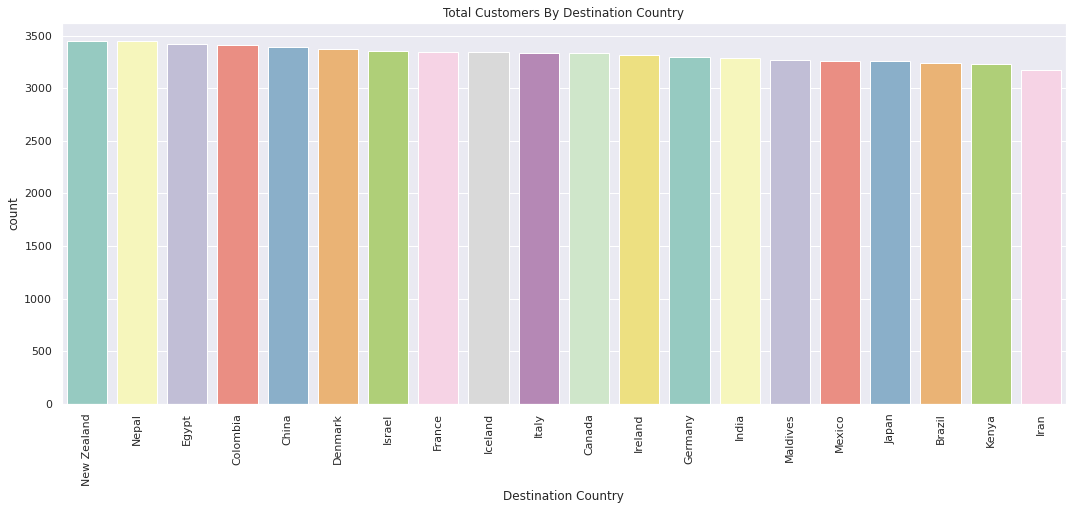

In [70]:
plt.figure(figsize=(18, 7))
sns.set_theme(style="darkgrid")
plot = sns.countplot(x="Destination Country", data=hostel_data, palette="Set3",order = hostel_data['Destination Country'].value_counts().index)
plot.set(title="Total Customers By Destination Country")
plt.xticks(rotation=90);


Total Customers By Origin Country

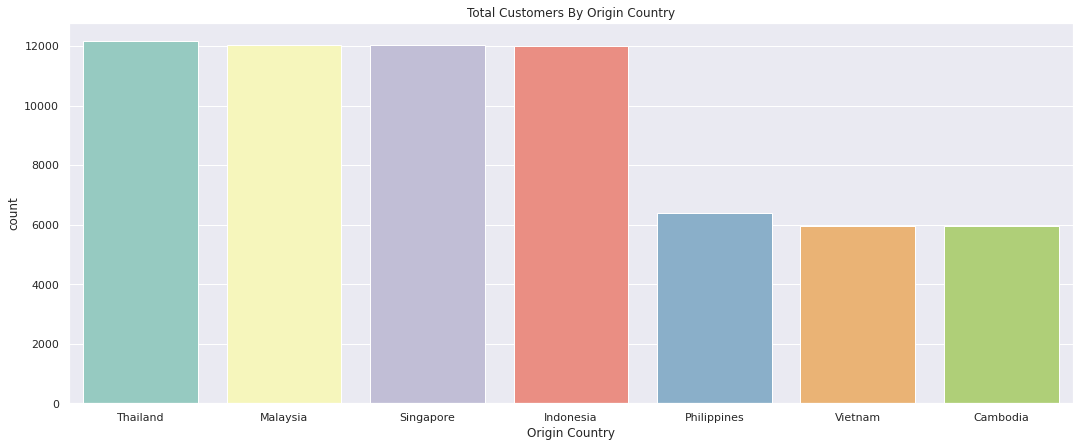

In [77]:
plt.figure(figsize=(18, 7))
sns.set_theme(style="darkgrid")
plot = sns.countplot(x="Origin Country", data=hostel_data, palette="Set3",order = hostel_data['Origin Country'].value_counts().index)
plot.set(title="Total Customers By Origin Country");


Total customers By Gender

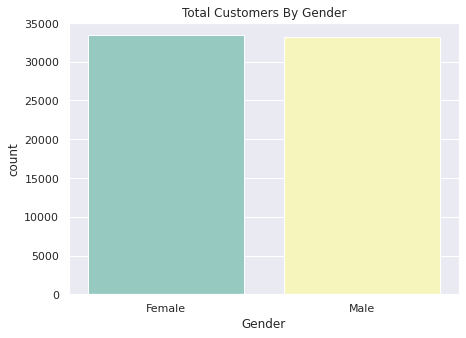

In [80]:
plt.figure(figsize=(7, 5))
sns.set_theme(style="darkgrid")
plot = sns.countplot(x="Gender", data=hostel_data, palette="Set3",order = hostel_data['Gender'].value_counts().index)
plot.set(title="Total Customers By Gender");

Total Booking Fee Over The Years

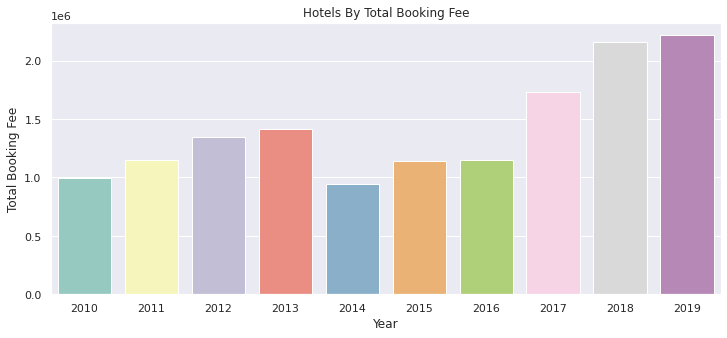

In [9]:
plt.figure(figsize=(12, 5))
sns.set_theme(style="darkgrid")
plot = sns.barplot(x="Year", data=hostel_data, palette="Set3", y = "Booking Price[SGD]", estimator=sum, ci=None)
plot.set(title="Hotels By Total Booking Fee", ylabel="Total Booking Fee");

Total Customers By Gender And Age Group


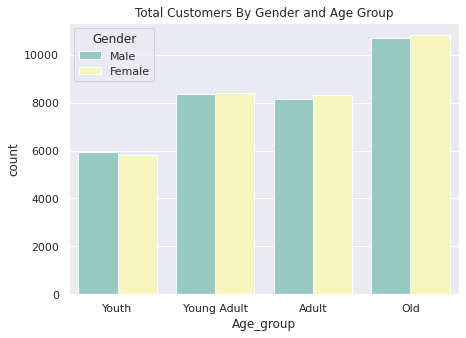

In [8]:
plt.figure(figsize=(7, 5))
sns.set_theme(style="darkgrid")
plot = sns.countplot(x="Age_group", data=hostel_data, palette="Set3",hue='Gender')
plot.set(title="Total Customers By Gender and Age Group");